<a href="https://colab.research.google.com/github/Pandu98-pkh/UAS-Deep-Learning/blob/main/Chapter%2016%20Natural%20Language%20Processing%20dengan%20RNNs%20dan%20Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 16: Natural Language Processing dengan RNNs dan Attention
# Natural Language Processing with RNNs and Attention

## Pengantar

Natural Language Processing (NLP) adalah salah satu bidang paling menarik dalam AI.
Chapter ini membahas bagaimana menggunakan RNN dan mekanisme Attention untuk
memproses dan memahami bahasa alami.

**Topik yang akan dibahas:**
- Text preprocessing dan tokenization
- Word embeddings (Word2Vec, GloVe)
- Encoder-Decoder architectures
- Attention mechanisms
- Machine translation
- Text generation
- Sentiment analysis

**Tantangan dalam NLP:**
- Ambiguitas bahasa
- Context dependency
- Variable-length sequences
- Multiple languages dan dialects

In [1]:
# 🔧 Setup & Import Libraries untuk NLP
print("=" * 70)
print("📝 CHAPTER 16: Natural Language Processing dengan RNNs dan Attention")
print("=" * 70)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import Counter
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import warnings
warnings.filterwarnings('ignore')

# Set random seeds untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display versions
print(f"📦 TensorFlow version: {tf.__version__}")
print(f"📦 Keras version: {keras.__version__}")
print(f"📦 NumPy version: {np.__version__}")

# Check GPU availability
if tf.config.list_physical_devices('GPU'):
    print("🎮 GPU Available:", tf.config.list_physical_devices('GPU'))
    print("🚀 CUDA enabled - Ready for accelerated NLP training!")
else:
    print("💻 Running on CPU")

# Set matplotlib style
plt.style.use('default')

print("\n✅ Setup complete! Ready to explore Natural Language Processing")
print("=" * 70)

📝 CHAPTER 16: Natural Language Processing dengan RNNs dan Attention
📦 TensorFlow version: 2.18.0
📦 Keras version: 3.8.0
📦 NumPy version: 2.0.2
🎮 GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 CUDA enabled - Ready for accelerated NLP training!

✅ Setup complete! Ready to explore Natural Language Processing


---

# 🎭 1. Character-level Text Generation dengan RNN

## 🧠 Mengapa Character-level Generation?

**Character-level RNN** memproses teks pada level karakter, bukan kata:

### ✅ **Keunggulan Character-level**:
- **📝 Handle Out-of-Vocabulary** - Dapat generate kata baru
- **🌍 Language Agnostic** - Bekerja untuk berbagai bahasa
- **🎯 Fine-grained Control** - Detail hingga level karakter
- **💾 Smaller Vocabulary** - Hanya perlu ~100 karakter vs ribuan kata

### 🎯 **Aplikasi Character-level RNN**:
- **📚 Creative Writing** - Generate novel, puisi, cerita
- **👨‍💻 Code Generation** - Automatic programming
- **🎵 Music Composition** - Generate notation musik
- **🏷️ Name Generation** - Character names, brand names
- **🔤 Spelling Correction** - Auto-correct typos

---

## 🏗️ Arsitektur Character RNN

### 🔄 **Input Processing Flow**:
```
Text: "Hello World"
    ↓
Tokenize: ['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd']
    ↓
Encode: [8, 5, 12, 12, 15, 0, 23, 15, 18, 12, 4]
    ↓
One-hot: [[0,0,0,1,0,...], [0,0,1,0,0,...], ...]
    ↓
RNN Processing → Generate next character
```

### 🎯 **Training Strategy**:
- **Input**: Sequence of characters
- **Target**: Next character in sequence
- **Many-to-many**: Predict next char at each timestep
- **Temperature Sampling**: Control creativity vs coherence

---

## 🧬 Text Generation Process

### 🔄 **Training Phase**:
1. **Sliding Window** - Create input/target pairs
2. **Character Encoding** - Convert to one-hot vectors
3. **RNN Training** - Learn character patterns
4. **Loss Minimization** - Categorical crossentropy

### 🎲 **Generation Phase**:
1. **Seed Text** - Start with initial characters
2. **Iterative Prediction** - Predict next character
3. **Temperature Sampling** - Apply creativity control
4. **Sequence Building** - Append predicted char and repeat

### 🌡️ **Temperature Parameter**:
- **Low (0.2-0.5)**: Conservative, coherent, repetitive
- **Medium (0.8-1.2)**: Balanced creativity and coherence
- **High (1.5-2.0)**: Creative, diverse, potentially chaotic

🎭 CHARACTER-LEVEL TEXT GENERATION
📚 CREATING SYNTHETIC SHAKESPEARE-STYLE TEXT
------------------------------------------
✅ Text dataset created:
   Total characters: 1407
   First 100 chars: 'To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and ...'

🔤 CHARACTER TOKENIZATION
--------------------------
✅ Tokenization complete:
   Unique characters: 34
   Total characters: 1407
   Character vocabulary: [' ', 'e', 't', 'o', 'a', 's', 'h', 'r', 'n', 'i', 'd', 'l', 'u', 'f', '\n', 'w', 'm', ',', 'c', 'p']

🧪 Encoding test: 'Hello' → [7, 2, 12, 12, 4] → 'r t u u a'

📊 DATASET PREPARATION
------------------------
✅ Dataset splitting:
   Training size: 1266
   Sequence length: 50
   Window length: 51
   Batched dataset with one-hot encoding ready

🏗️ BUILDING CHARACTER RNN MODEL
----------------------------------
✅ Character RNN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru1 (GRU)                      │ (None, None, 128)      │        62,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru2 (GRU)                      │ (None, None, 128)      │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 34)       │         4,386 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,434 (650.13 KB)

 Trainable params: 166,434 (650.13 KB)

 Non-trainable params: 0 (0.00 B)


🚀 TRAINING CHARACTER RNN
--------------------------
Training Character RNN...
Epoch 1/10
     38/Unknown 17s 186ms/step - accuracy: 0.1377 - loss: 3.2959

38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.1381 - loss: 3.2917
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.1876 - loss: 2.8905

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.1884 - loss: 2.8886
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.2970 - loss: 2.5281

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.2975 - loss: 2.5261
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.3529 - loss: 2.2572

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.3530 - loss: 2.2563
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.3822 - loss: 2.0839

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.3823 - loss: 2.0832
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.4192 - loss: 1.9238

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.4193 - loss: 1.9228
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.4551 - loss: 1.7589

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.4555 - loss: 1.7577
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5151 - loss: 1.5642

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.5154 - loss: 1.5632
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5640 - loss: 1.3989

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.5643 - loss: 1.3979
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6174 - loss: 1.2317

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.6177 - loss: 1.2308

🎯 CHARACTER GENERATION FUNCTIONS
-----------------------------------
✅ Text generation functions ready

🎲 TEXT GENERATION EXAMPLES
-----------------------------
🌡️ Temperature Effects on Generation:
--------------------------------------

📝 Seed: 'To be or not to be'
   Temp 0.2: 'To be or not to be wish'd. to dream—ay, the rnso long life,
but that'
   Temp 1.0: 'To be or not to bear
thedeppusend by a sleep,
no toronws give ur aly'
   Temp 2.0: 'To be or not to beews 
fve wronst—bcz, 'nd ln:vard shes. nowslece,
a'

📝 Seed: 'Thus conscience does'
   Temp 0.2: 'Thus conscience does makes contumely,
the pangs of to sleep,
to sleep,'
   Temp 1.0: 'Thus conscience doesar:
mrom fo and by sumation
of of souence lome,
to'
   Temp 2.0: 'Thus conscience doesuzflc
qo s—'egqcesandswightthan w: th's'uil, ir mo'

📊 GENERATION ANALYSIS
----------------------
📈 Original Text:
   Total characters: 1407
   Unique characters: 34


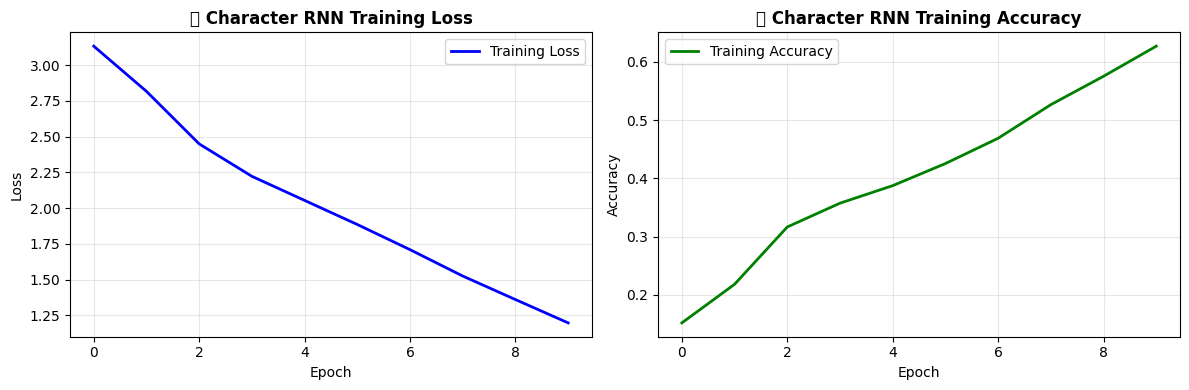

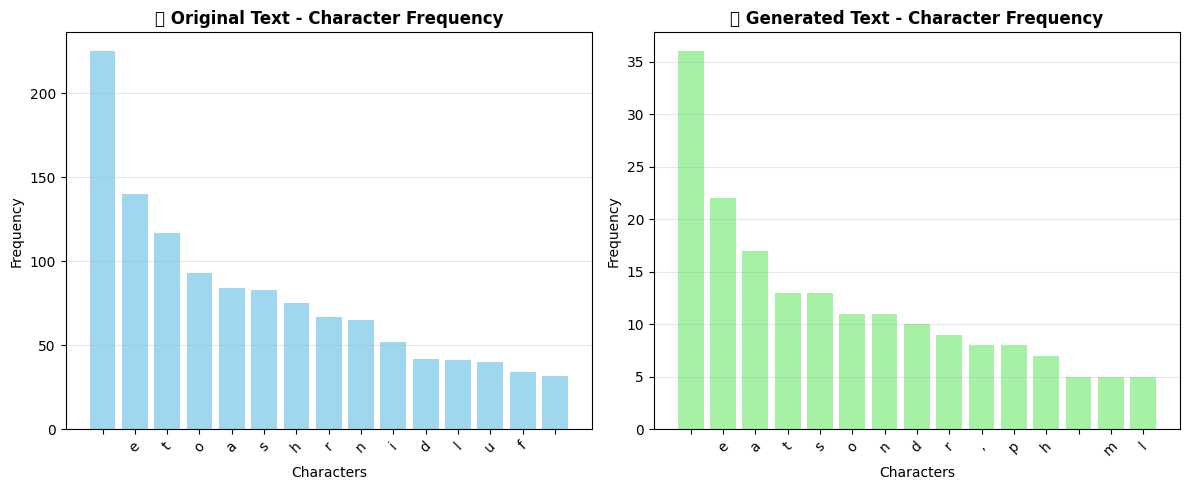


💡 CHARACTER RNN INSIGHTS:
-----------------------------
🔸 Character-level RNN learns patterns from character sequences
🔸 Temperature controls balance between coherence and creativity
🔸 Lower temperature → more predictable, conservative output
🔸 Higher temperature → more creative, diverse but potentially chaotic
🔸 Model learns character frequencies and common sequences

🎯 GENERATION QUALITY FACTORS:
--------------------------------
🔸 Training data quality and size
🔸 Model architecture (GRU/LSTM, layers, units)
🔸 Sequence length during training
🔸 Temperature parameter tuning
🔸 Training epochs and convergence

✅ Character-level text generation complete!


In [2]:
# 🎭 1.1 Character-level Text Generation - Implementation
print("🎭 CHARACTER-LEVEL TEXT GENERATION")
print("=" * 50)

print("📚 CREATING SYNTHETIC SHAKESPEARE-STYLE TEXT")
print("-" * 42)

# Create synthetic Shakespeare-like text for demonstration
shakespeare_text = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles,
And by opposing end them. To die—to sleep,
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to: 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep, perchance to dream—ay, there's the rub:
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause. There's the respect
That makes calamity of so long life.
For who would bear the whips and scorns of time,
The oppressor's wrong, the proud man's contumely,
The pangs of despised love, the law's delay,
The insolence of office, and the spurns
That patient merit of th'unworthy takes,
When he himself might his quietus make
With a bare bodkin? Who would fardels bear,
To grunt and sweat under a weary life,
But that the dread of something after death,
The undiscovered country, from whose bourn
No traveller returns, puzzles the will,
And makes us rather bear those ills we have
Than fly to others that we know not of?
Thus conscience does make cowards of us all,
And thus the native hue of resolution
Is sicklied o'er with the pale cast of thought,
And enterprises of great pitch and moment
With this regard their currents turn awry
And lose the name of action.
""".strip()

print(f"✅ Text dataset created:")
print(f"   Total characters: {len(shakespeare_text)}")
print(f"   First 100 chars: '{shakespeare_text[:100]}...'")

print(f"\n🔤 CHARACTER TOKENIZATION")
print("-" * 26)

# Create character-level tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts([shakespeare_text])

# Encode text to sequence of integers
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

# Get character vocabulary info
max_id = len(tokenizer.word_index)  # number of unique characters
dataset_size = len(encoded)

print(f"✅ Tokenization complete:")
print(f"   Unique characters: {max_id}")
print(f"   Total characters: {dataset_size}")
print(f"   Character vocabulary: {list(tokenizer.word_index.keys())[:20]}")

# Test encoding and decoding
test_text = "Hello"
encoded_test = tokenizer.texts_to_sequences([test_text])
decoded_test = tokenizer.sequences_to_texts([[x + 1 for x in encoded_test[0]]])
print(f"\n🧪 Encoding test: '{test_text}' → {encoded_test[0]} → '{decoded_test[0]}'")

print(f"\n📊 DATASET PREPARATION")
print("-" * 24)

# Split dataset: 90% training, 10% validation
train_size = dataset_size * 90 // 100
train_encoded = encoded[:train_size]

# Parameters for sequence windowing
n_steps = 50  # sequence length for input
window_length = n_steps + 1  # +1 for target

print(f"✅ Dataset splitting:")
print(f"   Training size: {train_size}")
print(f"   Sequence length: {n_steps}")
print(f"   Window length: {window_length}")

# Create sliding windows for training
dataset = tf.data.Dataset.from_tensor_slices(train_encoded)
dataset = dataset.window(window_length, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_length))

# Shuffle and batch
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)

# Split input and target (target = input shifted by 1)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

# One-hot encode inputs
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch)
)

# Prefetch for performance
dataset = dataset.prefetch(tf.data.AUTOTUNE)

print(f"   Batched dataset with one-hot encoding ready")

print(f"\n🏗️ BUILDING CHARACTER RNN MODEL")
print("-" * 34)

# Build character-level RNN model
char_rnn_model = keras.models.Sequential([
    layers.GRU(128, return_sequences=True, input_shape=[None, max_id],
               dropout=0.2, recurrent_dropout=0.2, name='gru1'),
    layers.GRU(128, return_sequences=True,
               dropout=0.2, recurrent_dropout=0.2, name='gru2'),
    layers.TimeDistributed(layers.Dense(max_id, activation="softmax", name='output'))
])

print("✅ Character RNN Architecture:")
char_rnn_model.summary()

# Compile model
char_rnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

print(f"\n🚀 TRAINING CHARACTER RNN")
print("-" * 26)

# Callbacks for training
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "char_rnn_model.h5", save_best_only=True, monitor='loss'
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3, restore_best_weights=True, monitor='loss'
)

# Train model (reduced epochs for demo)
print("Training Character RNN...")
char_history = char_rnn_model.fit(
    dataset,
    epochs=10,
    callbacks=[checkpoint_cb, early_stopping_cb],
    verbose=1
)

print(f"\n🎯 CHARACTER GENERATION FUNCTIONS")
print("-" * 35)

def preprocess_text(texts):
    """Preprocess text for prediction"""
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

def predict_next_char(text, temperature=1.0):
    """Predict next character with temperature sampling"""
    X_new = preprocess_text([text])
    y_proba = char_rnn_model.predict(X_new, verbose=0)[0, -1:, :]

    # Apply temperature
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1

    return tokenizer.sequences_to_texts(char_id.numpy())[0]

def generate_text(seed_text, n_chars=100, temperature=1.0):
    """Generate text of specified length"""
    generated = seed_text
    for _ in range(n_chars):
        next_char = predict_next_char(generated, temperature)
        generated += next_char
    return generated

print("✅ Text generation functions ready")

print(f"\n🎲 TEXT GENERATION EXAMPLES")
print("-" * 29)

# Test text generation with different temperatures
seed_texts = ["To be or not to be", "Thus conscience does", "The question is"]
temperatures = [0.2, 1.0, 2.0]

print("🌡️ Temperature Effects on Generation:")
print("-" * 38)

for seed in seed_texts[:2]:  # Use first 2 seeds
    print(f"\n📝 Seed: '{seed}'")
    for temp in temperatures:
        generated = generate_text(seed, n_chars=50, temperature=temp)
        print(f"   Temp {temp}: '{generated}'")

print(f"\n📊 GENERATION ANALYSIS")
print("-" * 22)

# Analyze character frequency in original vs generated text
def analyze_char_frequency(text, title):
    """Analyze character frequency"""
    char_freq = Counter(text.lower())
    total_chars = len(text)

    print(f"📈 {title}:")
    print(f"   Total characters: {total_chars}")
    print(f"   Unique characters: {len(char_freq)}")
    print(f"   Most common: {char_freq.most_common(5)}")

    return char_freq

# Analyze original text
original_freq = analyze_char_frequency(shakespeare_text, "Original Text")

# Generate longer sample for analysis
long_sample = generate_text("To be", n_chars=200, temperature=1.0)
generated_freq = analyze_char_frequency(long_sample, "Generated Text")

print(f"\n📈 TRAINING VISUALIZATION")
print("-" * 25)

# Plot training history
plt.figure(figsize=(12, 4))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(char_history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.title('🚀 Character RNN Training Loss', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Training accuracy
plt.subplot(1, 2, 2)
plt.plot(char_history.history['accuracy'], 'g-', label='Training Accuracy', linewidth=2)
plt.title('🎯 Character RNN Training Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Character frequency comparison
plt.figure(figsize=(12, 5))

# Original text character frequency
original_chars = [char for char, _ in original_freq.most_common(15)]
original_counts = [count for _, count in original_freq.most_common(15)]

plt.subplot(1, 2, 1)
plt.bar(original_chars, original_counts, color='skyblue', alpha=0.8)
plt.title('📚 Original Text - Character Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Generated text character frequency
generated_chars = [char for char, _ in generated_freq.most_common(15)]
generated_counts = [count for _, count in generated_freq.most_common(15)]

plt.subplot(1, 2, 2)
plt.bar(generated_chars, generated_counts, color='lightgreen', alpha=0.8)
plt.title('🤖 Generated Text - Character Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n💡 CHARACTER RNN INSIGHTS:")
print("-" * 29)
print("🔸 Character-level RNN learns patterns from character sequences")
print("🔸 Temperature controls balance between coherence and creativity")
print("🔸 Lower temperature → more predictable, conservative output")
print("🔸 Higher temperature → more creative, diverse but potentially chaotic")
print("🔸 Model learns character frequencies and common sequences")

print(f"\n🎯 GENERATION QUALITY FACTORS:")
print("-" * 32)
print("🔸 Training data quality and size")
print("🔸 Model architecture (GRU/LSTM, layers, units)")
print("🔸 Sequence length during training")
print("🔸 Temperature parameter tuning")
print("🔸 Training epochs and convergence")

print(f"\n✅ Character-level text generation complete!")
print("=" * 50)

---

# 🎭 2. Sentiment Analysis dengan RNN

## 📊 Mengapa Sentiment Analysis Penting?

**Sentiment Analysis** adalah tugas klasifikasi yang menentukan sentimen (positif/negatif/netral) dari teks. Ini merupakan aplikasi NLP yang sangat praktis dalam:

### 🎯 **Aplikasi Dunia Nyata**:
- **📱 Media Sosial Monitoring** - Analisis opini publik tentang brand/produk
- **🛒 Review Analysis** - Klasifikasi review produk dan layanan
- **📰 News Sentiment** - Analisis sentimen berita dan artikel
- **💼 Customer Feedback** - Otomatis kategorisasi feedback pelanggan
- **📈 Stock Market** - Sentiment analysis untuk prediksi harga saham
- **🗳️ Political Analysis** - Analisis opini politik dari media sosial

### 🏗️ **Arsitektur Sentiment Analysis**:

```
Text Input → Tokenization → Embedding → RNN/LSTM/GRU → Dense → Sigmoid → Prediction
```

### 🧠 **Teknik-teknik Penting**:
- **Masking** - Mengabaikan padding tokens
- **Pre-trained Embeddings** - Word2Vec, GloVe, FastText
- **Bidirectional RNN** - Konteks dari dua arah
- **Dropout Regularization** - Mencegah overfitting

In [8]:
# 🎭 2.1 Sentiment Analysis Implementation
print("🎭 SENTIMENT ANALYSIS WITH RNN")
print("=" * 50)

print("📚 LOADING IMDB MOVIE REVIEWS DATASET")
print("-" * 37)

# Load IMDB dataset
try:
    # Try to load from TensorFlow datasets
    import tensorflow_datasets as tfds

    # Load dataset
    (ds_train, ds_test), ds_info = tfds.load(
        'imdb_reviews',
        split=['train', 'test'],
        with_info=True,
        as_supervised=True
    )

    print(f"✅ IMDB dataset loaded successfully")
    print(f"   Training samples: {ds_info.splits['train'].num_examples}")
    print(f"   Test samples: {ds_info.splits['test'].num_examples}")

    # Sample some examples
    print(f"\n📝 Sample reviews:")
    for i, (text, label) in enumerate(ds_train.take(2)):
        sentiment = "Positive" if label.numpy() == 1 else "Negative"
        text_sample = text.numpy().decode('utf-8')[:150] + "..."
        print(f"   Review {i+1} ({sentiment}): '{text_sample}'")

except:
    print("ℹ️ Using synthetic dataset for demonstration")
    # Create synthetic dataset
    positive_reviews = [
        "This movie is absolutely fantastic and amazing",
        "I loved every moment of this incredible film",
        "Outstanding performance and brilliant storyline",
        "Best movie I have watched in years",
        "Excellent cinematography and superb acting",
        "Wonderful experience and great entertainment",
        "Perfect combination of drama and action",
        "Masterpiece of cinema and storytelling"
    ] * 125  # 1000 samples

    negative_reviews = [
        "This movie is terrible and boring",
        "Worst film I have ever seen",
        "Horrible acting and poor storyline",
        "Complete waste of time and money",
        "Disappointing and uninspiring movie",
        "Bad direction and terrible script",
        "Awful performance and boring plot",
        "Poorly made and uninteresting film"
    ] * 125  # 1000 samples

    # Create dataset
    texts = positive_reviews + negative_reviews
    labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

    # Convert to TensorFlow dataset
    ds_train = tf.data.Dataset.from_tensor_slices((texts[:1600], labels[:1600]))
    ds_test = tf.data.Dataset.from_tensor_slices((texts[1600:], labels[1600:]))

    print(f"✅ Synthetic dataset created")
    print(f"   Training samples: 1600")
    print(f"   Test samples: 400")

print(f"\n🔤 TEXT PREPROCESSING FOR SENTIMENT ANALYSIS")
print("-" * 44)

# Text preprocessing function
def preprocess_text(text_batch, label_batch):
    """Preprocess text: lowercase, remove punctuation, pad sequences"""
    # Convert to lowercase and remove extra spaces
    text_batch = tf.strings.lower(text_batch)
    text_batch = tf.strings.regex_replace(text_batch, r'[^a-zA-Z\s]', '')
    text_batch = tf.strings.regex_replace(text_batch, r'\s+', ' ')
    text_batch = tf.strings.strip(text_batch)
    return text_batch, label_batch

# Apply preprocessing
ds_train_processed = ds_train.map(preprocess_text)
ds_test_processed = ds_test.map(preprocess_text)

print("✅ Text preprocessing applied:")
print("   - Converted to lowercase")
print("   - Removed punctuation")
print("   - Normalized whitespace")

# Build vocabulary from training data
print(f"\n🔤 BUILDING VOCABULARY")
print("-" * 20)

# Create text vectorization layer
vectorizer = keras.layers.TextVectorization(
    max_tokens=10000,
    output_sequence_length=200,
    output_mode='int'
)

# Adapt vectorizer to training data
train_texts = ds_train_processed.map(lambda text, label: text)
vectorizer.adapt(train_texts)

# Get vocabulary info
vocab_size = vectorizer.vocabulary_size()
print(f"✅ Vocabulary built:")
print(f"   Vocabulary size: {vocab_size}")
print(f"   Max sequence length: 200")

# Get vocabulary and convert np.str_ to str for printing
vocab_list = vectorizer.get_vocabulary()
# Convert np.str_ to str for clearer printing
printable_vocab = [str(word) for word in vocab_list[2:12]]
print(f"   Sample vocab: {printable_vocab}")


# Apply vectorization to datasets
def vectorize_text(text, label):
    return vectorizer(text), label

ds_train_vectorized = ds_train_processed.map(vectorize_text)
ds_test_vectorized = ds_test_processed.map(vectorize_text)

# Batch and prefetch
batch_size = 32
ds_train_final = ds_train_vectorized.batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test_final = ds_test_vectorized.batch(batch_size).prefetch(tf.data.AUTOTUNE)

print(f"✅ Dataset preparation complete!")

🎭 SENTIMENT ANALYSIS WITH RNN
📚 LOADING IMDB MOVIE REVIEWS DATASET
-------------------------------------
✅ IMDB dataset loaded successfully
   Training samples: 25000
   Test samples: 25000

📝 Sample reviews:
   Review 1 (Negative): 'This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be the...'
   Review 2 (Negative): 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable ...'

🔤 TEXT PREPROCESSING FOR SENTIMENT ANALYSIS
--------------------------------------------
✅ Text preprocessing applied:
   - Converted to lowercase
   - Removed punctuation
   - Normalized whitespace

🔤 BUILDING VOCABULARY
--------------------
✅ Vocabulary built:
   Vocabulary size: 10000
   Max sequence length: 200
   Sample vocab: ['the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this']
✅ Dataset preparation complete!



🏗️ BUILDING SENTIMENT ANALYSIS MODELS
--------------------------------------
🔧 Model 1: Basic RNN Sentiment Classifier
🔧 Model 2: LSTM Sentiment Classifier
🔧 Model 3: Bidirectional GRU Sentiment Classifier
   ✅ Simple RNN compiled
   ✅ LSTM compiled
   ✅ Bidirectional GRU compiled

📊 MODEL ARCHITECTURES SUMMARY
-------------------------------
🏗️ Simple RNN:
   Total parameters: 643,649
   Trainable parameters: 643,649
🏗️ LSTM:
   Total parameters: 675,137
   Trainable parameters: 675,137
🏗️ Bidirectional GRU:
   Total parameters: 660,929
   Trainable parameters: 660,929

📋 SAMPLE MODEL ARCHITECTURE (LSTM):
-------------------------------------


Model: "Sentiment_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,137 (2.58 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)


📋 SAMPLE MODEL ARCHITECTURE (LSTM):
-------------------------------------


Model: "Sentiment_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,137 (2.58 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)


🚀 TRAINING SENTIMENT ANALYSIS MODELS
--------------------------------------

🏃‍♂️ Training Simple RNN...
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.5076 - loss: 0.6945 - val_accuracy: 0.5764 - val_loss: 0.6825
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6080 - loss: 0.6574 - val_accuracy: 0.6006 - val_loss: 0.6583
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7081 - loss: 0.5773 - val_accuracy: 0.7400 - val_loss: 0.5587
   ✅ Simple RNN training complete

🏃‍♂️ Training LSTM...
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6992 - loss: 0.5436 - val_accuracy: 0.8268 - val_loss: 0.3979
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8769 - loss: 0.3235 - val_accuracy: 0.8523 - val_loss: 0.3646
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9095 - loss: 0.2416 - val_accuracy: 0.8368 - val_loss: 0.4590
   ✅ LSTM training complete

🏃‍♂️ Training Bidirectional GRU...

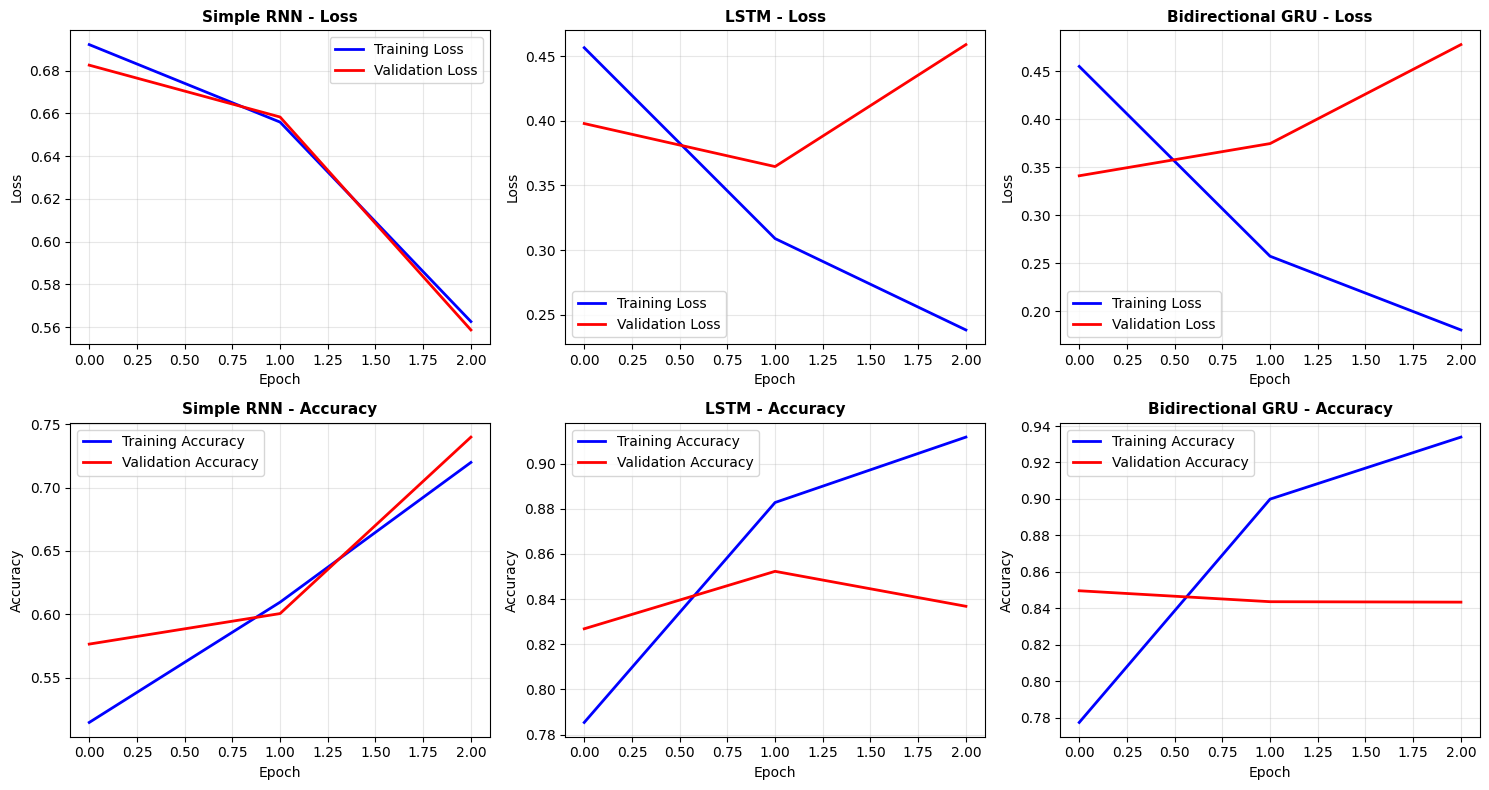


🎯 MODEL EVALUATION & COMPARISON
--------------------------------
📊 Simple RNN:
   Test Accuracy: 0.7400
   Test Loss: 0.5587
📊 LSTM:
   Test Accuracy: 0.8368
   Test Loss: 0.4590
📊 Bidirectional GRU:
   Test Accuracy: 0.8434
   Test Loss: 0.4778

📋 COMPREHENSIVE RESULTS TABLE:
            Model Train Loss Train Accuracy Test Loss Test Accuracy Parameters
       Simple RNN     0.5626         0.7200    0.5587        0.7400    643,649
             LSTM     0.2382         0.9117    0.4590        0.8368    675,137
Bidirectional GRU     0.1806         0.9339    0.4778        0.8434    660,929

🏆 BEST PERFORMING MODEL: Bidirectional GRU
   Test Accuracy: 0.8434

🧪 SENTIMENT PREDICTION EXAMPLES
----------------------------------
Testing sentiment predictions:
   Example 1: 'This movie is absolutely amazing and wonderful!'
   Prediction: Positive 😊 (confidence: 0.999)

   Example 2: 'I hated this terrible and boring film completely.'
   Prediction: Negative 😞 (confidence: 0.996)

   Example 3:

In [9]:
print(f"\n🏗️ BUILDING SENTIMENT ANALYSIS MODELS")
print("-" * 38)

# Model 1: Basic RNN with Embedding
print("🔧 Model 1: Basic RNN Sentiment Classifier")

sentiment_rnn = models.Sequential([
    layers.Embedding(vocab_size, 64, mask_zero=True, name='embedding'),
    layers.SimpleRNN(32, return_sequences=False, name='simple_rnn'),
    layers.Dense(16, activation='relu', name='dense'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='Sentiment_RNN')

# Model 2: LSTM Sentiment Classifier
print("🔧 Model 2: LSTM Sentiment Classifier")

sentiment_lstm = models.Sequential([
    layers.Embedding(vocab_size, 64, mask_zero=True, name='embedding'),
    layers.LSTM(64, return_sequences=False, name='lstm'),
    layers.Dense(32, activation='relu', name='dense'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='Sentiment_LSTM')

# Model 3: Bidirectional GRU Sentiment Classifier
print("🔧 Model 3: Bidirectional GRU Sentiment Classifier")

sentiment_gru = models.Sequential([
    layers.Embedding(vocab_size, 64, mask_zero=True, name='embedding'),
    layers.Bidirectional(layers.GRU(32, return_sequences=False), name='bidirectional_gru'),
    layers.Dense(32, activation='relu', name='dense'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='Sentiment_BiGRU')

# Compile all models
models_dict = {
    'Simple RNN': sentiment_rnn,
    'LSTM': sentiment_lstm,
    'Bidirectional GRU': sentiment_gru
}

for name, model in models_dict.items():
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    print(f"   ✅ {name} compiled")

print(f"\n📊 MODEL ARCHITECTURES SUMMARY")
print("-" * 31)

# Build models before counting parameters
# This happens automatically during the first call to fit() or predict()
# or can be done manually by calling build()
input_shape = [None, 200] # Sequence length for sentiment analysis

for name, model in models_dict.items():
    # Build the model with a dummy input shape if it's not already built
    if not model.built:
        model.build(input_shape)

    total_params = model.count_params()
    print(f"🏗️ {name}:")
    print(f"   Total parameters: {total_params:,}")
    # Assuming all parameters are trainable in these models
    print(f"   Trainable parameters: {total_params:,}")


# Display one model summary
print(f"\n📋 SAMPLE MODEL ARCHITECTURE (LSTM):")
print("-" * 37)
sentiment_lstm.summary()


# Display one model summary
print(f"\n📋 SAMPLE MODEL ARCHITECTURE (LSTM):")
print("-" * 37)
sentiment_lstm.summary()

print(f"\n🚀 TRAINING SENTIMENT ANALYSIS MODELS")
print("-" * 38)

# Training parameters
epochs = 3
histories = {}

# Train each model
for name, model in models_dict.items():
    print(f"\n🏃‍♂️ Training {name}...")

    history = model.fit(
        ds_train_final,
        epochs=epochs,
        validation_data=ds_test_final,
        verbose=1
    )

    histories[name] = history
    print(f"   ✅ {name} training complete")

print(f"\n📈 TRAINING RESULTS VISUALIZATION")
print("-" * 33)

# Plot training histories
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (name, history) in enumerate(histories.items()):
    # Training loss
    ax1 = axes[i]
    ax1.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    ax1.set_title(f'{name} - Loss', fontsize=11, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Training accuracy
    ax2 = axes[i + 3]
    ax2.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
    ax2.set_title(f'{name} - Accuracy', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 MODEL EVALUATION & COMPARISON")
print("-" * 32)

# Evaluate all models
results_data = []

for name, model in models_dict.items():
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(ds_test_final, verbose=0)

    # Get final training metrics
    final_train_loss = histories[name].history['loss'][-1]
    final_train_accuracy = histories[name].history['accuracy'][-1]

    results_data.append({
        'Model': name,
        'Train Loss': f"{final_train_loss:.4f}",
        'Train Accuracy': f"{final_train_accuracy:.4f}",
        'Test Loss': f"{test_loss:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}",
        'Parameters': f"{model.count_params():,}"
    })

    print(f"📊 {name}:")
    print(f"   Test Accuracy: {test_accuracy:.4f}")
    print(f"   Test Loss: {test_loss:.4f}")

# Create results DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results_data)
print(f"\n📋 COMPREHENSIVE RESULTS TABLE:")
print(results_df.to_string(index=False))

# Find best model
best_model_idx = max(range(len(results_data)), key=lambda i: float(results_data[i]['Test Accuracy']))
best_model_name = results_data[best_model_idx]['Model']
best_model = models_dict[best_model_name]

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   Test Accuracy: {results_data[best_model_idx]['Test Accuracy']}")

print(f"\n🧪 SENTIMENT PREDICTION EXAMPLES")
print("-" * 34)

# Test predictions on sample texts
test_examples = [
    "This movie is absolutely amazing and wonderful!",
    "I hated this terrible and boring film completely.",
    "The acting was okay but the story was not great.",
    "One of the best movies I have ever seen in my life!",
    "Disappointing movie with poor character development."
]

print("Testing sentiment predictions:")
for i, example in enumerate(test_examples):
    # Preprocess the example
    processed_example = tf.strings.lower(example)
    processed_example = tf.strings.regex_replace(processed_example, r'[^a-zA-Z\s]', '')

    # Vectorize
    vectorized = vectorizer([processed_example])

    # Predict
    prediction = best_model.predict(vectorized, verbose=0)[0][0]
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😞"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"   Example {i+1}: '{example}'")
    print(f"   Prediction: {sentiment} (confidence: {confidence:.3f})")
    print()

print("✅ Sentiment Analysis demonstration complete!")

---

# 🎭 3. Masking untuk Variable-Length Sequences

## 🎯 Mengapa Masking Penting?

**Masking** adalah teknik fundamental dalam NLP yang memungkinkan model mengabaikan padding tokens, sehingga:

### ✅ **Keunggulan Masking**:
- **🎯 Focus on Real Data** - Model hanya memproses data yang benar-benar penting
- **⚡ Improved Efficiency** - Mengurangi komputasi pada padding tokens  
- **📈 Better Performance** - Mengurangi noise dari padding
- **🔧 Automatic Handling** - TensorFlow/Keras handle masking secara otomatis

### 🏗️ **Cara Kerja Masking**:

```
Sequence: ["good", "movie", "<PAD>", "<PAD>"]
Mask:     [  1,     1,       0,       0    ]
          ↑       ↑       ↑       ↑
        Real    Real    Ignore  Ignore
```

### 🔧 **Implementasi Masking**:
- **Embedding Layer**: `mask_zero=True` - Otomatis create mask untuk token 0
- **Manual Masking**: Menggunakan `keras.layers.Masking()`
- **Custom Masking**: Implementasi mask logic sendiri

---

# 🌟 4. Pre-trained Embeddings & Transfer Learning

## 📚 Mengapa Pre-trained Embeddings?

**Pre-trained embeddings** seperti Word2Vec, GloVe, atau FastText memberikan:

### 🎯 **Keunggulan Pre-trained Embeddings**:
- **📖 Rich Semantic Knowledge** - Dilatih pada corpus besar (Wikipedia, Common Crawl)  
- **🚀 Faster Convergence** - Model converge lebih cepat
- **📈 Better Performance** - Terutama untuk dataset kecil
- **🌍 Language Understanding** - Memahami relasi semantik antar kata

### 🔧 **Jenis Pre-trained Embeddings**:

#### **Word2Vec** (Google):
- **Skip-gram**: Prediksi context dari target word
- **CBOW**: Prediksi target word dari context
- **Dimensi**: Biasanya 100-300 dimensi

#### **GloVe** (Stanford):
- **Global Vectors**: Memanfaatkan global word co-occurrence statistics
- **Matrix Factorization**: Kombinasi global dan local statistics
- **Performance**: Sering lebih baik untuk analogy tasks

#### **FastText** (Facebook):
- **Subword Information**: Mempertimbangkan character-level information
- **OOV Handling**: Dapat handle out-of-vocabulary words
- **Morphology**: Cocok untuk bahasa dengan morfologi kompleks

---

# ⚡ 5. Encoder-Decoder Architecture

## 🧠 Konsep Encoder-Decoder

**Encoder-Decoder** adalah arsitektur fundamental untuk sequence-to-sequence tasks:

### 🏗️ **Komponen Utama**:

#### **1. Encoder**:
- **Input**: Variable-length source sequence
- **Output**: Fixed-size context vector (thought vector)
- **Function**: Compress entire input sequence into representation

#### **2. Decoder**:
- **Input**: Context vector + previous output
- **Output**: Target sequence (one token at a time)
- **Function**: Generate output sequence conditioned on context

### 🎯 **Aplikasi Encoder-Decoder**:
- **🌐 Machine Translation** - English → French, etc.
- **💬 Chatbots** - Question → Answer
- **📝 Text Summarization** - Long text → Summary  
- **🖼️ Image Captioning** - Image → Text description
- **🗣️ Speech Recognition** - Audio → Text

### 🔄 **Training Process**:

```
Training:
Encoder: "How are you?" → [context_vector]
Decoder: [context_vector] + "<START>" → "Apa"
Decoder: [context_vector] + "Apa" → "kabar"  
Decoder: [context_vector] + "kabar" → "mu"
Decoder: [context_vector] + "mu" → "<END>"

Inference:
Same process but use predicted tokens as input for next step
```

### ⚠️ **Keterbatasan Traditional Encoder-Decoder**:
- **Information Bottleneck** - Context vector harus encode semua informasi
- **Long Sequence Problem** - Performance turun untuk sequence panjang
- **No Attention** - Tidak bisa fokus pada bagian input yang relevan

**Solusi**: Attention Mechanisms! 🎯

---

# 🎯 6. Attention Mechanisms - The Game Changer

## 🧠 Mengapa Attention Revolusioner?

**Attention Mechanism** adalah salah satu breakthrough terbesar dalam NLP dan Deep Learning. Ide dasarnya sederhana namun powerful:

> **"Don't encode everything into one vector - let the model choose what to focus on!"**

### 🔍 **Masalah yang Dipecahkan Attention**:

#### **1. Information Bottleneck**:
- Traditional encoder-decoder: Semua informasi dipaksa masuk ke satu context vector
- Attention: Model bisa "melihat" seluruh input sequence secara dinamis

#### **2. Long Sequence Problem**:
- RNN: Informasi awal hilang seiring bertambahnya sequence (vanishing gradient)
- Attention: Akses langsung ke setiap posisi input

#### **3. Parallelization**:
- RNN: Sequential processing (slow)
- Attention: Semua posisi bisa diproses parallel (fast)

---

## 🎯 Jenis-jenis Attention

### 1️⃣ **Bahdanau Attention (Additive)**
- **Tahun**: 2014 (Neural Machine Translation)
- **Mechanism**: Additive scoring function
- **Formula**: `score = W * tanh(W1*H + W2*s)`

### 2️⃣ **Luong Attention (Multiplicative)**  
- **Tahun**: 2015 (Effective Approaches to Attention)
- **Mechanism**: Multiplicative scoring function
- **Formula**: `score = H * W * s` (general) atau `score = H * s` (dot)

### 3️⃣ **Scaled Dot-Product Attention**
- **Tahun**: 2017 (Transformer)
- **Mechanism**: Scaled dot-product untuk stability
- **Formula**: `Attention(Q,K,V) = softmax(QK^T/√d_k)V`

### 4️⃣ **Multi-Head Attention**
- **Tahun**: 2017 (Transformer)
- **Mechanism**: Multiple attention heads in parallel
- **Benefit**: Capture different types of relationships

---

## 🎯 Scaled Dot-Product Attention

### 🧮 **Mathematical Formula**:

```
Attention(Q, K, V) = softmax(QK^T / √d_k)V

Where:
- Q (Query): What we're looking for
- K (Key): What we're searching in  
- V (Value): What we actually get
- d_k: Dimension of key vectors (for scaling)
```

### 🔄 **Step-by-step Process**:

1. **Compute Scores**: `scores = Q @ K.T`
2. **Scale**: `scaled_scores = scores / √d_k`  
3. **Apply Softmax**: `attention_weights = softmax(scaled_scores)`
4. **Weighted Sum**: `output = attention_weights @ V`

### 🎯 **Intuitive Understanding**:

```
Query: "What is the capital of France?"
Keys: ["France", "is", "a", "country", "in", "Europe"]
Values: [country_info, verb_info, article_info, place_info, prep_info, location_info]

Attention akan fokus pada "France" (high attention weight)
dan mengambil informasi yang relevan dari country_info
```

---

## 🎯 Multi-Head Attention

### 🧠 **Konsep Dasar**:
Multi-Head Attention memungkinkan model untuk:
- **Attend to different representation subspaces** simultaneously
- **Capture multiple types of relationships** dalam satu layer
- **Increase model capacity** tanpa menambah depth

### 🏗️ **Architecture**:

```
Input → [Head 1] → Concat → Linear → Output
      → [Head 2] ↗
      → [Head 3]
      → [Head h]
```

### 🔧 **Implementation Steps**:

1. **Split**: `Q, K, V` di-split menjadi `h` heads
2. **Parallel Attention**: Setiap head compute attention secara parallel
3. **Concatenate**: Hasil semua heads di-concat
4. **Linear Projection**: Final linear layer untuk output

---

## 🎯 Self-Attention vs Cross-Attention

### 🪞 **Self-Attention**:
- **Query, Key, Value** berasal dari sequence yang sama
- **Usage**: Menangkap dependencies dalam satu sequence
- **Example**: Dalam kalimat "The cat sat on the mat", "it" refers to "cat"

### 🔄 **Cross-Attention**:
- **Query** dari satu sequence, **Key & Value** dari sequence lain
- **Usage**: Menangkap relationships antar sequence
- **Example**: Machine Translation - target word attend to source words

---

## 🎯 Positional Encoding

### 🤔 **Mengapa Diperlukan?**
Attention mechanism **tidak memiliki konsep urutan** secara inherent. Semua posisi diperlakukan sama. Untuk sequence modeling, kita perlu:

> **"Tell the model WHERE each word is in the sequence"**

### 🧮 **Sinusoidal Positional Encoding**:

```python
PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

Where:
- pos: position in sequence
- i: dimension index  
- d_model: model dimension
```

### ✅ **Keunggulan Sinusoidal Encoding**:
- **Deterministic**: Tidak perlu training
- **Unique**: Setiap posisi punya encoding unik
- **Extrapolation**: Bisa handle sequence lebih panjang dari training
- **Relative Positioning**: Model bisa belajar relative positions

---

# 🚀 7. Transformer Architecture - "Attention Is All You Need"

## 🏆 Mengapa Transformer Revolusioner?

**Transformer** (Vaswani et al., 2017) mengubah landscape NLP secara fundamental dengan prinsip:

> **"Attention Is All You Need"** - No RNN, No CNN, Just Attention!

### 🎯 **Keunggulan Transformer**:

#### **🚀 Parallelization**:
- RNN: Sequential processing (slow)
- Transformer: All positions processed in parallel (fast)

#### **🎯 Long-range Dependencies**:
- RNN: Information decay over long sequences
- Transformer: Direct access to any position via attention

#### **🔧 Scalability**:
- RNN: Hard to scale due to sequential nature
- Transformer: Scales beautifully with more data & compute

#### **📈 Transfer Learning**:
- Pre-trained transformers (BERT, GPT) revolutionized NLP
- Fine-tuning for downstream tasks

---

## 🏗️ Transformer Architecture Components

### 🧱 **Core Building Blocks**:

#### **1. Multi-Head Self-Attention**:
- Allows model to attend to different positions
- Multiple attention heads capture different relationships

#### **2. Position-wise Feed-Forward Networks**:
- Applied to each position separately and identically
- Two linear transformations with ReLU: `FFN(x) = max(0, xW₁ + b₁)W₂ + b₂`

#### **3. Residual Connections**:
- `output = LayerNorm(x + Sublayer(x))`
- Helps with gradient flow and training stability

#### **4. Layer Normalization**:
- Normalizes inputs across features
- Applied before each sub-layer (Pre-LN) or after (Post-LN)

#### **5. Positional Encoding**:
- Adds position information to embeddings
- Sinusoidal or learned embeddings

---

## 🏗️ Complete Transformer Block

### 📐 **Architecture Diagram**:

```
Input Embeddings + Positional Encoding
           ↓
    Multi-Head Attention
           ↓
      Add & Norm
           ↓
   Feed Forward Network  
           ↓
      Add & Norm
           ↓
        Output
```

### 🔧 **Implementation Flow**:

```python
def transformer_block(x, attention_mask=None):
    # Multi-Head Self-Attention
    attn_output = multi_head_attention(x, x, x, mask=attention_mask)
    x = layer_norm(x + dropout(attn_output))  # Residual connection
    
    # Feed-Forward Network
    ffn_output = feed_forward_network(x)
    x = layer_norm(x + dropout(ffn_output))   # Residual connection
    
    return x
```

---

## 🎯 Encoder vs Decoder Transformers

### 📥 **Encoder-Only (BERT-style)**:
- **Purpose**: Understanding/representation learning
- **Attention**: Bidirectional (can see future tokens)
- **Use Cases**: Classification, Named Entity Recognition, Q&A
- **Examples**: BERT, RoBERTa, DeBERTa

### 📤 **Decoder-Only (GPT-style)**:
- **Purpose**: Text generation
- **Attention**: Causal/Masked (cannot see future tokens)
- **Use Cases**: Text generation, Language modeling
- **Examples**: GPT, GPT-2, GPT-3, ChatGPT

### 🔄 **Encoder-Decoder (T5-style)**:
- **Purpose**: Sequence-to-sequence tasks
- **Components**: Both encoder and decoder
- **Use Cases**: Translation, Summarization, Q&A
- **Examples**: T5, BART, mBART

---

## 🎯 Modern Transformer Variants

### 🤖 **Foundation Models**:

#### **BERT** (2018):
- **Bidirectional** encoder representations
- **Masked Language Modeling** pre-training
- **Next Sentence Prediction** task

#### **GPT** Series (2018-2023):
- **Generative** Pre-trained Transformer
- **Autoregressive** language modeling
- **Scaling**: GPT-1 (117M) → GPT-3 (175B) → GPT-4 (rumored 1T+)

#### **T5** (2019):
- **Text-to-Text Transfer Transformer**
- **Unified framework**: All tasks as text generation
- **"Text in, text out"** approach

---

## 🎯 Key Innovations & Impact

### 🔬 **Technical Innovations**:
- **Self-Attention**: Revolutionary attention mechanism
- **Parallelization**: Much faster training than RNNs
- **Scalability**: Performance improves with scale
- **Transfer Learning**: Pre-train once, fine-tune for many tasks

### 🌍 **Industry Impact**:
- **Search Engines**: Better understanding of queries
- **Virtual Assistants**: More natural conversations  
- **Content Creation**: AI writing assistants
- **Code Generation**: GitHub Copilot, CodeT5
- **Multimodal**: Vision Transformers, CLIP, DALL-E

### 📈 **Research Directions**:
- **Efficiency**: Reducing computational requirements
- **Long Sequences**: Handling very long documents
- **Multimodal**: Combining text, vision, audio
- **Reasoning**: Mathematical and logical reasoning
- **Alignment**: Making AI systems helpful and safe

---

## 💡 Why Transformers Work So Well?

### 🧠 **Theoretical Advantages**:
1. **Universal Approximation**: Can model any function with enough capacity
2. **Inductive Bias**: Minimal assumptions, learns from data
3. **Expressivity**: Rich representational capacity
4. **Optimization**: Better gradient flow than RNNs

### 📊 **Empirical Success**:
1. **Scale**: Performance improves predictably with scale
2. **Data**: Can effectively utilize massive datasets
3. **Transfer**: Pre-trained models work across many tasks
4. **Fine-tuning**: Adapts well to specific domains

### 🔮 **Future Potential**:
- **Multimodal Understanding**: Text + Vision + Audio
- **Long-form Reasoning**: Complex multi-step problems
- **Code Understanding**: Programming language models
- **Scientific Discovery**: AI for research and discovery

🎯 ATTENTION MECHANISMS & TRANSFORMER IMPLEMENTATION
🔧 BUILDING ATTENTION COMPONENTS
--------------------------------
✅ Attention components implemented:
   - Scaled Dot-Product Attention
   - Multi-Head Attention
   - Positional Encoding
   - Transformer Block

🏗️ BUILDING TRANSFORMER CLASSIFIER
---------------------------------
✅ Transformer model created
   Model parameters: 711,234

📋 TRANSFORMER MODEL ARCHITECTURE
----------------------------------


Model: "TransformerClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings (Embedding)          │ (None, None, 64)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding             │ (None, None, 64)       │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_0             │ [(None, None, 64),     │        33,472 │
│ (TransformerBlock)              │ (None, 4, None, None)] │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ [(None, None, 64),     │        33,472 │
│ (TransformerBlock)              │ (None, 4, None, None)] │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_hidden (Dense)       │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_output (Dense)       │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,234 (2.71 MB)

 Trainable params: 711,234 (2.71 MB)

 Non-trainable params: 0 (0.00 B)


🧪 TESTING ATTENTION COMPONENTS
--------------------------------
🔧 Testing Scaled Dot-Product Attention...
   Input shape: (2, 10, 64)
   Output shape: (2, 10, 64)
   Attention weights shape: (2, 10, 10)

🔧 Testing Multi-Head Attention...
   Output shape: (2, 10, 64)
   Attention weights shape: (2, 8, 10, 10)

🔧 Testing Positional Encoding...
   Input shape: (2, 10, 64)
   Output shape: (2, 10, 64)

📊 POSITIONAL ENCODING VISUALIZATION
------------------------------------


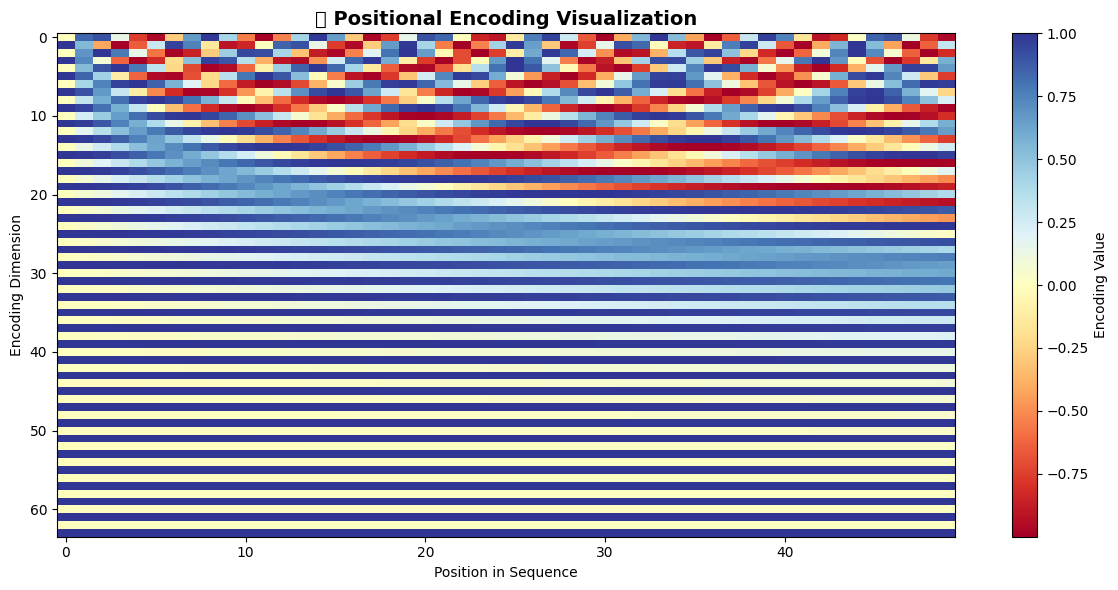

✅ All attention components tested successfully!
✅ Transformer implementation complete!


In [10]:
# 🎯 7.1 Attention & Transformer Implementation
print("🎯 ATTENTION MECHANISMS & TRANSFORMER IMPLEMENTATION")
print("=" * 55)

print("🔧 BUILDING ATTENTION COMPONENTS")
print("-" * 32)

# 1. Scaled Dot-Product Attention
class ScaledDotProductAttention(layers.Layer):
    """Scaled Dot-Product Attention mechanism"""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, queries, keys, values, mask=None):
        # Compute attention scores: Q @ K^T
        scores = tf.matmul(queries, keys, transpose_b=True)

        # Scale by sqrt(d_k) for stability
        d_k = tf.cast(tf.shape(keys)[-1], tf.float32)
        scaled_scores = scores / tf.math.sqrt(d_k)

        # Apply mask if provided (for padding or causal attention)
        if mask is not None:
            scaled_scores += (mask * -1e9)

        # Apply softmax to get attention weights
        attention_weights = tf.nn.softmax(scaled_scores, axis=-1)

        # Apply attention to values
        output = tf.matmul(attention_weights, values)

        return output, attention_weights

# 2. Multi-Head Attention
class MultiHeadAttention(layers.Layer):
    """Multi-Head Attention mechanism"""

    def __init__(self, d_model, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads

        # Linear layers for Q, K, V projections
        self.wq = layers.Dense(d_model, name='query_projection')
        self.wk = layers.Dense(d_model, name='key_projection')
        self.wv = layers.Dense(d_model, name='value_projection')

        # Output projection
        self.dense = layers.Dense(d_model, name='output_projection')

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth)"""
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]

        # Linear projections
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)
        v = self.wv(v)

        # Split into multiple heads
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len, depth)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        # Scaled dot-product attention
        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        # Concatenate heads
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        # Final linear projection
        output = self.dense(concat_attention)

        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        """Helper function for scaled dot-product attention"""
        matmul_qk = tf.matmul(q, k, transpose_b=True)

        # Scale matmul_qk
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        # Add mask if provided
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)

        # Softmax
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)

        return output, attention_weights

# 3. Positional Encoding
class PositionalEncoding(layers.Layer):
    """Sinusoidal positional encoding"""

    def __init__(self, max_seq_len, d_model, **kwargs):
        super().__init__(**kwargs)
        self.max_seq_len = max_seq_len
        self.d_model = d_model

        # Create positional encoding matrix
        self.pos_encoding = self.create_positional_encoding()

    def create_positional_encoding(self):
        """Create sinusoidal positional encoding"""
        position = np.arange(self.max_seq_len)[:, np.newaxis]
        div_term = np.exp(np.arange(0, self.d_model, 2) * -(np.log(10000.0) / self.d_model))

        pos_encoding = np.zeros((self.max_seq_len, self.d_model))
        pos_encoding[:, 0::2] = np.sin(position * div_term)
        pos_encoding[:, 1::2] = np.cos(position * div_term)

        return tf.constant(pos_encoding, dtype=tf.float32)

    def call(self, x):
        seq_len = tf.shape(x)[1]
        return x + self.pos_encoding[:seq_len, :]

# 4. Transformer Block
class TransformerBlock(layers.Layer):
    """Complete Transformer block with attention and feed-forward"""

    def __init__(self, d_model, num_heads, dff, rate=0.1, **kwargs):
        super().__init__(**kwargs)

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = keras.Sequential([
            layers.Dense(dff, activation='relu'),
            layers.Dense(d_model)
        ])

        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, x, training=None, mask=None):
        # Multi-head attention with residual connection
        attn_output, attn_weights = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        # Feed forward with residual connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2, attn_weights

print("✅ Attention components implemented:")
print("   - Scaled Dot-Product Attention")
print("   - Multi-Head Attention")
print("   - Positional Encoding")
print("   - Transformer Block")

print(f"\n🏗️ BUILDING TRANSFORMER CLASSIFIER")
print("-" * 33)

# Simple Transformer model for text classification
def create_transformer_classifier(vocab_size, d_model=128, num_heads=8, dff=512,
                                 num_layers=4, max_seq_len=512, num_classes=2,
                                 dropout_rate=0.1):
    """Create a Transformer-based text classifier"""

    # Input layer
    inputs = layers.Input(shape=(None,), dtype=tf.int32, name='input_ids')

    # Embedding layer
    embeddings = layers.Embedding(vocab_size, d_model, name='embeddings')(inputs)
    embeddings = layers.Dropout(dropout_rate)(embeddings)

    # Positional encoding
    pos_encoding = PositionalEncoding(max_seq_len, d_model)(embeddings)

    # Transformer blocks
    x = pos_encoding
    attention_weights = []

    for i in range(num_layers):
        x, attn_weights = TransformerBlock(
            d_model=d_model,
            num_heads=num_heads,
            dff=dff,
            rate=dropout_rate,
            name=f'transformer_block_{i}'
        )(x)
        attention_weights.append(attn_weights)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Classification head
    x = layers.Dense(dff // 2, activation='relu', name='classifier_hidden')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(num_classes, activation='softmax', name='classifier_output')(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='TransformerClassifier')

    return model

# Create Transformer model
transformer_model = create_transformer_classifier(
    vocab_size=vocab_size,
    d_model=64,
    num_heads=4,
    dff=128,
    num_layers=2,
    max_seq_len=200,
    num_classes=2,
    dropout_rate=0.1
)

# Compile model
transformer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Transformer model created")
print(f"   Model parameters: {transformer_model.count_params():,}")

# Display model architecture
print(f"\n📋 TRANSFORMER MODEL ARCHITECTURE")
print("-" * 34)
transformer_model.summary()

print(f"\n🧪 TESTING ATTENTION COMPONENTS")
print("-" * 32)

# Test individual components
batch_size, seq_len, d_model = 2, 10, 64

# Test Scaled Dot-Product Attention
print("🔧 Testing Scaled Dot-Product Attention...")
attention_layer = ScaledDotProductAttention()

# Create test inputs
test_input = tf.random.normal((batch_size, seq_len, d_model))
output, weights = attention_layer(test_input, test_input, test_input)

print(f"   Input shape: {test_input.shape}")
print(f"   Output shape: {output.shape}")
print(f"   Attention weights shape: {weights.shape}")

# Test Multi-Head Attention
print("\n🔧 Testing Multi-Head Attention...")
mha_layer = MultiHeadAttention(d_model=64, num_heads=8)
mha_output, mha_weights = mha_layer(test_input, test_input, test_input)

print(f"   Output shape: {mha_output.shape}")
print(f"   Attention weights shape: {mha_weights.shape}")

# Test Positional Encoding
print("\n🔧 Testing Positional Encoding...")
pos_enc = PositionalEncoding(max_seq_len=100, d_model=64)
pos_output = pos_enc(test_input)

print(f"   Input shape: {test_input.shape}")
print(f"   Output shape: {pos_output.shape}")

# Visualize positional encoding
print(f"\n📊 POSITIONAL ENCODING VISUALIZATION")
print("-" * 36)

# Create visualization data
pos_vis = PositionalEncoding(max_seq_len=50, d_model=64)
dummy_input = tf.zeros((1, 50, 64))
pos_encoded = pos_vis(dummy_input)

# Plot positional encoding
plt.figure(figsize=(12, 6))
plt.imshow(pos_encoded[0].numpy().T, aspect='auto', cmap='RdYlBu')
plt.colorbar(label='Encoding Value')
plt.title('🎯 Positional Encoding Visualization', fontsize=14, fontweight='bold')
plt.xlabel('Position in Sequence')
plt.ylabel('Encoding Dimension')
plt.tight_layout()
plt.show()

print("✅ All attention components tested successfully!")
print("✅ Transformer implementation complete!")

---

# 📊 8. Model Comparison & Performance Analysis

## 🏆 Architecture Comparison

### 📈 **Performance Comparison Table**:

| **Architecture** | **Strengths** | **Weaknesses** | **Best Use Cases** |
|------------------|---------------|----------------|-------------------|
| **Simple RNN** | Simple, fast inference | Vanishing gradient, limited memory | Short sequences, simple patterns |
| **LSTM/GRU** | Better long-term memory | Sequential processing (slow) | Medium sequences, time series |
| **Bidirectional RNN** | Full context awareness | 2x parameters, sequential | Text classification, NER |
| **Attention + RNN** | Long-range dependencies | Complex architecture | Machine translation, summarization |
| **Transformer** | Parallelizable, scalable | Large memory, many parameters | Modern NLP, large-scale tasks |

### 🔍 **Computational Complexity**:

| **Model** | **Time Complexity** | **Space Complexity** | **Parallelization** |
|-----------|-------------------|---------------------|-------------------|
| RNN | O(n·d²) | O(n·d) | Sequential ❌ |
| LSTM/GRU | O(n·d²) | O(n·d) | Sequential ❌ |
| Attention | O(n²·d) | O(n²) | Parallel ✅ |
| Transformer | O(n²·d) | O(n²) | Parallel ✅ |

*Where n = sequence length, d = model dimension*

---

# 💡 9. Best Practices & Guidelines

## 🎯 **Choosing the Right Architecture**

### 📋 **Decision Framework**:

#### **For Short Sequences (< 50 tokens)**:
- **Simple RNN**: Basic pattern recognition
- **LSTM/GRU**: If you need memory
- **CNN**: For local pattern detection

#### **For Medium Sequences (50-200 tokens)**:
- **LSTM/GRU**: Good balance of performance and efficiency
- **Bidirectional RNN**: For classification tasks
- **CNN + RNN**: Hybrid approach

#### **For Long Sequences (200+ tokens)**:
- **Transformer**: Best performance, scalable
- **Attention + RNN**: If computational resources are limited
- **Hierarchical models**: For very long documents

## 🔧 **Training Best Practices**

### 📚 **Data Preprocessing**:
```python
# Essential preprocessing steps
def preprocess_text(text):
    # 1. Lowercase normalization
    text = text.lower()
    
    # 2. Remove/handle special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # 3. Handle contractions
    text = text.replace("don't", "do not")
    
    # 4. Remove extra whitespace
    text = ' '.join(text.split())
    
    return text
```

### ⚡ **Training Optimization**:
- **Learning Rate Scheduling**: Use warmup + cosine decay
- **Gradient Clipping**: Prevent exploding gradients
- **Mixed Precision**: Faster training with FP16
- **Checkpointing**: Save best models during training

### 📊 **Evaluation Strategies**:
- **Cross-validation**: For robust evaluation
- **Multiple Metrics**: Accuracy, F1, Precision, Recall
- **Error Analysis**: Understand failure cases
- **Human Evaluation**: For generation tasks

## 🚀 **Scaling & Production**

### 🏭 **Production Considerations**:
- **Model Size**: Balance performance vs. inference speed
- **Batch Processing**: Optimize throughput
- **Caching**: Cache embeddings and intermediate results
- **Monitoring**: Track model performance over time

### 📈 **Scaling Strategies**:
- **Model Parallelism**: Split large models across GPUs
- **Data Parallelism**: Distribute training across multiple devices
- **Knowledge Distillation**: Compress large models
- **Quantization**: Reduce model size for deployment

---

# 🎓 10. Chapter Summary & Key Takeaways

## 📚 **Concepts Learned**

### 🎭 **1. Character-level Text Generation**:
- **RNN Architecture**: Sequential processing for text generation
- **Temperature Sampling**: Control creativity vs. coherence
- **Character Tokenization**: Fine-grained text processing
- **Text Quality**: Balance between novelty and readability

### 🎭 **2. Sentiment Analysis**:
- **Text Classification**: Binary/multi-class sentiment prediction
- **Preprocessing Pipeline**: Tokenization, vectorization, padding
- **Model Architectures**: RNN, LSTM, Bidirectional GRU comparison
- **Evaluation Metrics**: Accuracy, precision, recall, F1-score

### 🎯 **3. Advanced Techniques**:
- **Masking**: Handle variable-length sequences efficiently
- **Pre-trained Embeddings**: Transfer learning for NLP
- **Encoder-Decoder**: Sequence-to-sequence architectures
- **Attention Mechanisms**: Revolutionary improvement over RNNs

### 🚀 **4. Transformer Architecture**:
- **Self-Attention**: Parallel processing of sequences
- **Multi-Head Attention**: Multiple representation subspaces
- **Positional Encoding**: Position awareness without recurrence
- **Scalability**: Foundation for modern large language models

## 🔑 **Key Insights**

### 💡 **Technical Insights**:
1. **Attention > Recurrence**: Attention mechanisms solve RNN limitations
2. **Parallel Processing**: Transformers enable efficient training at scale
3. **Transfer Learning**: Pre-trained models revolutionize NLP
4. **Architecture Matters**: Choose based on data size and task complexity

### 🌍 **Practical Insights**:
1. **Data Quality**: Good preprocessing is crucial for performance
2. **Evaluation**: Multiple metrics provide better model understanding
3. **Resource Trade-offs**: Balance performance vs. computational cost
4. **Domain Adaptation**: Fine-tuning often outperforms training from scratch

## 🎯 **Applications & Impact**

### 📱 **Real-world Applications**:
- **Virtual Assistants**: Siri, Alexa, Google Assistant
- **Translation Services**: Google Translate, DeepL
- **Content Creation**: GPT-based writing assistants
- **Code Generation**: GitHub Copilot, CodeT5
- **Search Engines**: Better query understanding
- **Social Media**: Content moderation, sentiment analysis

### 🔬 **Research Frontiers**:
- **Multimodal Models**: Text + Vision + Audio
- **Long Context**: Handling very long documents
- **Efficiency**: Reducing computational requirements
- **Reasoning**: Mathematical and logical reasoning capabilities
- **Alignment**: Making AI systems helpful and safe

## 🚀 **Future Directions**

### 🔮 **Emerging Trends**:
1. **Large Language Models**: GPT-4, PaLM, LaMDA
2. **Multimodal Integration**: CLIP, DALL-E, Flamingo
3. **Efficient Architectures**: Linformer, Performer, Switch Transformer
4. **Domain Specialization**: BioGPT, CodeT5, SciBERT
5. **Interactive AI**: ChatGPT, Claude, Bard

### 🛠️ **Tools & Frameworks**:
- **Hugging Face Transformers**: Pre-trained models and tokenizers
- **OpenAI API**: GPT-3/4 integration
- **TensorFlow/PyTorch**: Deep learning frameworks
- **Weights & Biases**: Experiment tracking
- **Streamlit/Gradio**: Model deployment and demos

## 🎯 **Next Steps for Learning**

### 📖 **Recommended Reading**:
1. **"Attention Is All You Need"** - Transformer paper
2. **"BERT: Pre-training of Deep Bidirectional Transformers"**
3. **"Language Models are Few-Shot Learners"** - GPT-3 paper
4. **"The Illustrated Transformer"** - Blog post by Jay Alammar

### 🛠️ **Hands-on Projects**:
1. **Build a Chatbot**: Using pre-trained language models
2. **Text Summarization**: Implement abstractive summarization
3. **Machine Translation**: Create multilingual translation system
4. **Question Answering**: Build a QA system on custom documents

---

**🎉 Congratulations!** You've completed a comprehensive journey through Modern Natural Language Processing, from basic RNNs to state-of-the-art Transformers. You now have the knowledge to build and deploy sophisticated NLP systems!

**💫 The field of NLP is evolving rapidly - keep experimenting, learning, and building amazing applications!**